In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
with open("../../Files/Ames_Housing_Feature_Description.txt", "r") as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
df = pd.read_csv("after_fill.csv")

In [4]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,0,0,20,RL,141.0,31770,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,1,1,20,RH,80.0,11622,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,2,2,20,RL,81.0,14267,Pave,NaN,IR1,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,3,3,20,RL,93.0,11160,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,4,4,60,RL,74.0,13830,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,2920,2922,2925,80,RL,37.0,7937,Pave,NaN,IR1,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2921,2921,2923,2926,20,RL,NaN,8885,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2922,2922,2924,2927,85,RL,62.0,10441,Pave,NaN,Reg,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2923,2923,2925,2928,20,RL,77.0,10010,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [5]:
def percent_missing(dataframe):
    percent_nan = 100 * dataframe.isnull().sum() / len(dataframe)
    percent_nan = percent_nan[percent_nan > 0].sort_values()

    return percent_nan

In [6]:
gar_str_cols = ["Garage Type", "Garage Finish", "Garage Qual", "Garage Cond"]

In [7]:
df[gar_str_cols] = df[gar_str_cols].fillna("None")

In [8]:
df["Garage Yr Blt"] = df["Garage Yr Blt"].fillna(0)

In [9]:
percentage_missing = percent_missing(df)

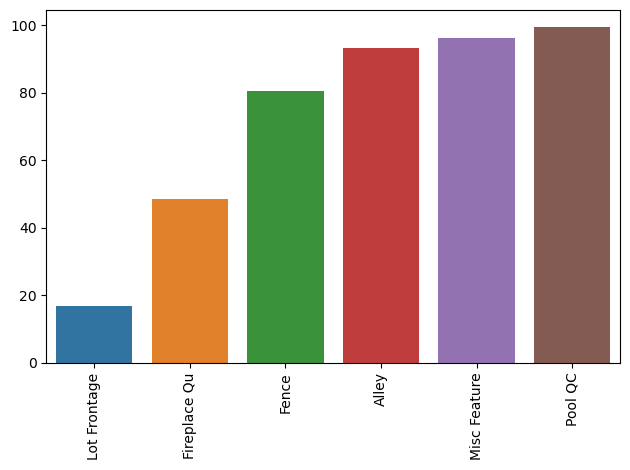

In [10]:
plt.figure(dpi=100)
sns.barplot(x=percentage_missing.index, y=percentage_missing)
plt.xticks(rotation=90)
plt.tight_layout()

In [11]:
df = df.drop(["Pool QC", "Misc Feature", "Alley", "Fence"], axis=1)

In [12]:
df["Fireplace Qu"] = df["Fireplace Qu"].fillna("None")

In [13]:
percentage_missing_drop_column = percent_missing(df)

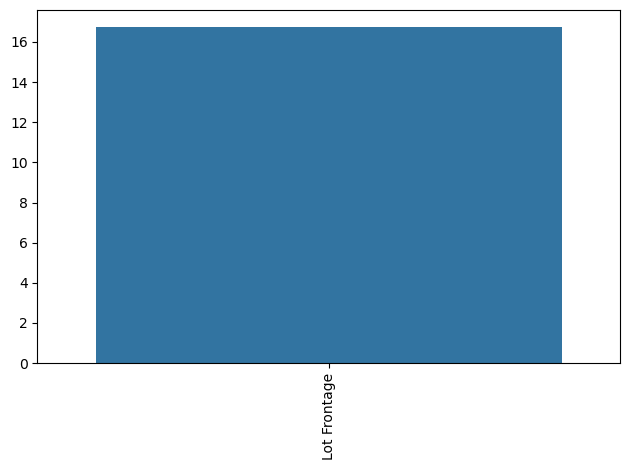

In [14]:
plt.figure(dpi=100)
sns.barplot(x=percentage_missing_drop_column.index, y=percentage_missing_drop_column)
plt.xticks(rotation=90)
plt.tight_layout()

In [15]:
df.to_csv("after_fixing.csv")